In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv("diamonds.csv")
df.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df.shape

(53940, 10)

In [8]:
df['Cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [28]:
max(df['Price'])

18823

# EXPLORATORY DATA ANALYSIS

C:\Users\ShwethaShRiVaishnavi\AppData\Local\Temp\ipykernel_1140\109518039.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  aa = sns.barplot(data = df, x = df['Cut'], y = df['Price'], palette = 'CMRmap')


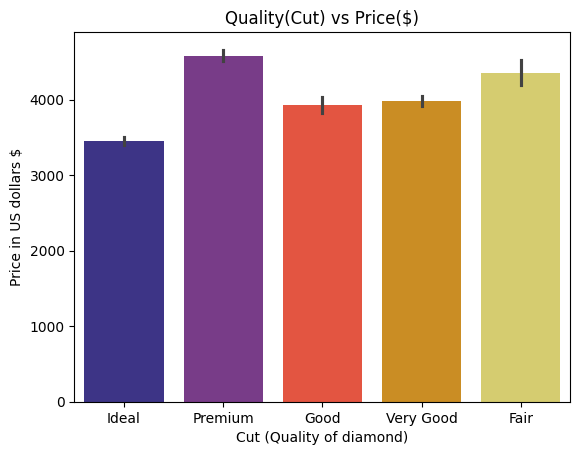

In [37]:
aa = sns.barplot(data = df, x = df['Cut'], y = df['Price'], palette = 'CMRmap')
aa.set(xlabel = "Cut (Quality of diamond)", ylabel = "Price in US dollars $", title = "Quality(Cut) vs Price($)")
plt.show()

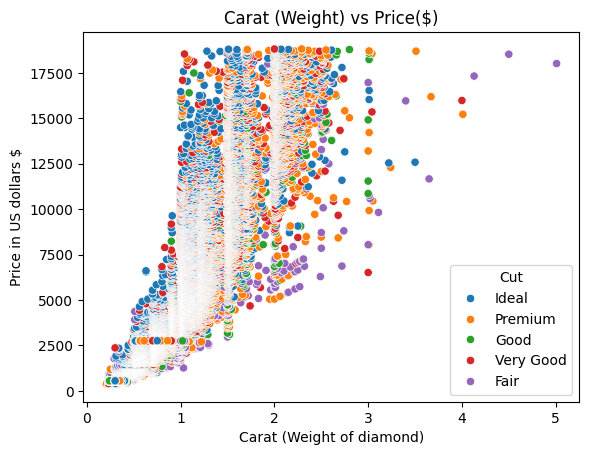

In [40]:
ab = sns.scatterplot(data = df, x = 'Carat', y = 'Price', hue = 'Cut')
ab.set(xlabel = "Carat (Weight of diamond)" , ylabel = "Price in US dollars $", title = "Carat (Weight) vs Price($)")
plt.show()

In [41]:
df['Color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

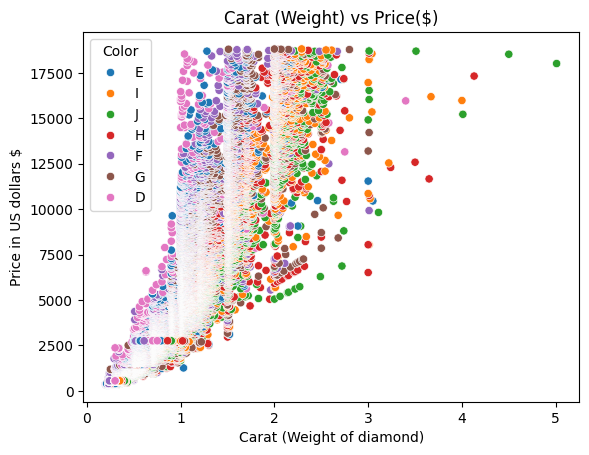

In [42]:
ac = sns.scatterplot(data = df, x = 'Carat', y = 'Price', hue = 'Color')
ac.set(xlabel = "Carat (Weight of diamond)" , ylabel = "Price in US dollars $", title = "Carat (Weight) vs Price($)")
plt.show()

C:\Users\ShwethaShRiVaishnavi\AppData\Local\Temp\ipykernel_1140\2618461124.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ad = sns.barplot(data = df, x = df['Color'], y = df['Price'], palette = 'CMRmap')


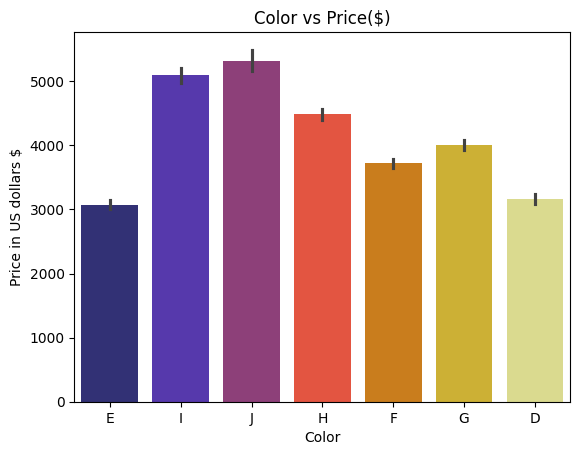

In [45]:
ad = sns.barplot(data = df, x = df['Color'], y = df['Price'], palette = 'CMRmap')
ad.set(xlabel = "Color", ylabel = "Price in US dollars $", title = "Color vs Price($)")
plt.show()

In [46]:
df['Clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

# Data Preprocessing

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Carat    53940 non-null  float64
 1   Cut      53940 non-null  object 
 2   Color    53940 non-null  object 
 3   Clarity  53940 non-null  object 
 4   Depth    53940 non-null  float64
 5   Table    53940 non-null  float64
 6   Price    53940 non-null  int64  
 7   X        53940 non-null  float64
 8   Y        53940 non-null  float64
 9   Z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [49]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [50]:
df['Cut'] = le.fit_transform(df['Cut'])

In [51]:
df['Cut'].unique()

array([2, 3, 1, 4, 0])

In [52]:
df['Color'] = le.fit_transform(df['Color'])

In [53]:
df['Color'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [54]:
df['Clarity'] = le.fit_transform(df['Clarity'])

In [55]:
df['Clarity'].unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

In [56]:
df.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


# MACHINE LEARNING MODEL BUIDLING

In [60]:
x = df.drop('Price', axis=1)

In [61]:
y = df['Price']

In [63]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 2)


# Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [70]:
ypredict = rf.predict(xtest)

In [82]:
mae = mean_absolute_error(ytest, ypredict)
mse = mean_squared_error(ytest, ypredict)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypredict)
print("Mean absolute error:", mae)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("r2_score:", r2)

Mean absolute error: 271.2126781211929
Mean squared error: 297280.1799117386
Root mean squared error: 545.2340597502495
r2_score: 0.9812149931235126
